This work is done out of the article https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/ <- by author Jason BrownLee , I will try to tune the hypermaters of the model to improve the accuracy Trying out an l2 loss of 0.1 and applying batch normalisation and Dropout Regularisation Variation This is also overfitting !! 

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_30 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 32)        0         
_______________________________________________

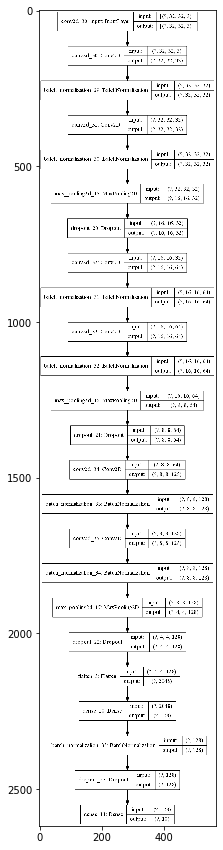

In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2

batch_size = 64
num_classes = 10
epochs = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_train /= 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#Adding a root mean sqaure optimiser to test the improvement in accuracy  
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)

model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

print(model.summary())
%matplotlib inline
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Generate the plot
plot_model(model, to_file = 'model_plot_cifar10_VGG3CONVLayer_1.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = mpimg.imread('model_plot_cifar10_VGG3CONVLayer_1.png')
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img)

In [19]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

model.save("cifar_vgg3convlayer_1.h5")

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/10
782/782 [==============================] - 142s 182ms/step - loss: 3.2009 - accuracy: 0.3188 - val_loss: 187195.5781 - val_accuracy: 0.1023
Epoch 2/10
782/782 [==============================] - 145s 186ms/step - loss: 2.6868 - accuracy: 0.4267 - val_loss: 141902.0781 - val_accuracy: 0.1544
Epoch 3/10
782/782 [==============================] - 132s 169ms/step - loss: 2.5399 - accuracy: 0.4677 - val_loss: 105096.0000 - val_accuracy: 0.1664
Epoch 4/10
782/782 [==============================] - 133s 170ms/step - loss: 2.4275 - accuracy: 0.4984 - val_loss: 110205.5547 - val_accuracy: 0.1354
Epoch 5/10
782/782 [==============================] - 130s 167ms/step - loss: 2.3433 - accuracy: 0.5192 - val_loss: 105478.6250 - val_accuracy: 0.1347
Epoch 6/10
782/782 [==============================] - 129s 165ms/step - loss: 2.2560 - accuracy: 0.5365 - val_loss: 93907.3281 - val_accuracy: 0.1466
Epoch 7/10
782/782 [==============================] - 132s 169ms/step - loss: 2.1706 - accuracy